In [2]:
# Inclination Change Using Targeter
from AstroSat import *
from pySTK import *

# Initialize Scenario
stk = pySTK()
root = stk.Root()
startEpoch = '11 Oct 2024 00:00:00.000'
test = stk.Scenario('test',startEpoch,'+1yr')

sat = AstroSat('sat1',test,root)
sat.insertInitialStateKeplerian('InnerOrbit','11 Oct 2024 00:00:000.00',6570,0,28,0,0,0)
sat.PropagateDuration('insert','2hours','-',7200,'Earth HPOP Default v10')
# Begin Hohmann
BeginHohmann = sat.insertTargetSequence('BeginHohmann','-')
sat.Maneuver('create','DV1','-','Impulsive','Thrust Vector','Satellite VNC(Earth)')
DV1 = sat.insertSegmentToSequenceByName(BeginHohmann,'DV1')
sat.enableManeuverControl(BeginHohmann,'DV1',DV1,'x')
sat.addApoapsisResult(DV1,'DV1',BeginHohmann,'Earth',42160)
sat.PropagateApoapsis('insert','ToApogee','-','Earth','Earth HPOP Default v10')
# Finish Hohmann
FinishHohmann = sat.insertTargetSequence('FinishHohmann','-')
sat.Maneuver('create','DV2','-','Impulsive','Thrust Vector','Satellite VNC(Earth)')
DV2 = sat.insertSegmentToSequenceByName(FinishHohmann,'DV2')
sat.enableManeuverControl(FinishHohmann,'DV2',DV2,'x')
sat.addManeuverEccentricityResult(DV2,'DV2',FinishHohmann,'Earth',0)
sat.PropagateAscendingNode('insert','ToAscendingNode','-','Earth','Earth HPOP Default v10')
# Plane Change
PlaneChange = sat.insertTargetSequence('PlaneChange','-')
sat.Maneuver('create','DV3','-','Impulsive','Thrust Vector','Satellite VNC(Earth)')
DV3 = sat.insertSegmentToSequenceByName(PlaneChange,'DV3')
sat.enableManeuverControl(PlaneChange,'DV3',DV3,'xy')
sat.addManeuverInclinationResult(DV3,'DV3',PlaneChange,'Earth',0)
sat.PropagateDuration('insert','36hours','-',36*3600,'Earth HPOP Default v10')
sat.runMCS()
stk.ManeuverSummary('sat1','C:\\Users\\jamie\\Desktop\\inclinationChange.txt')


In [1]:
file = open('C:\\Users\\jamie\\Desktop\\inclinationChange.txt')
lines = file.readlines()
for line in lines:
    print(line)

                                                                                                                                                                                                               12 May 2021 22:55:34

FOR UNFUNDED EDUCATIONAL USE ONLY

Satellite-sat1





                                        Maneuver Number         Segment             Start Time (UTCG)           Stop Time (UTCG)        Duration (sec)    Est./Act. Finite Burn Duration (sec)    Delta V (m/sec)    Fuel Used (kg)

                                        ---------------    -----------------    ------------------------    ------------------------    --------------    ------------------------------------    ---------------    --------------

                                                      1    BeginHohmann.DV1     11 Oct 2024 02:00:00.000    11 Oct 2024 02:00:00.000             0.000                                3331.498        2457.051330           566.197

                             

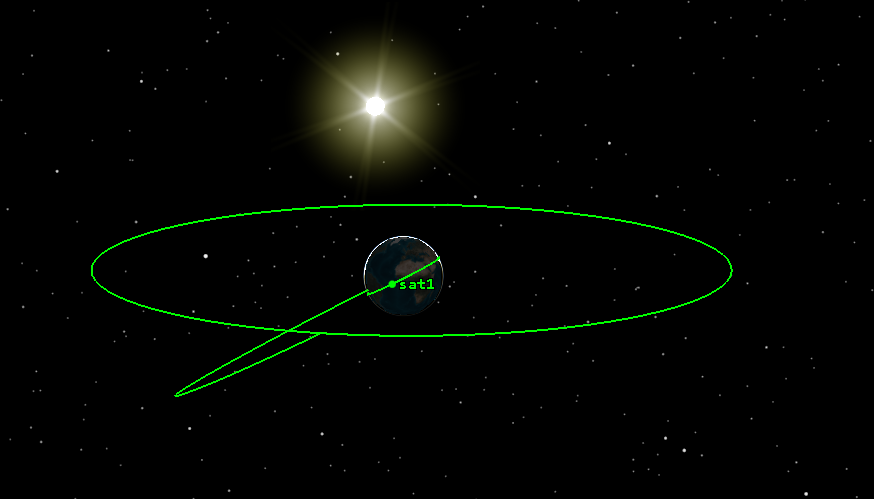
